# Set Up

In [1]:
#load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency, fisher_exact
import numpy as np

In [2]:
#set paths
current_directory = os.getcwd()
base_dir = f'{os.path.dirname(current_directory)}/'
data_dir = f'{base_dir}Source_Data/'
fig_dir = f'{base_dir}/figures/'

In [3]:
# set color palettes and variable order
ses_palette = {
    'ses-1': '#440154',
    'ses-2': '#414487', 
    'ses-3': '#2a788e',
    'ses-4': '#22a884',
    'ses-5': '#7ad151'}

dysGroup_palette = {
    'dyslexic': '#8E44AD',
    'typical': '#BB8FCE'}

subGroup_palette = {
    'intervention': '#CD5C5C',
    'dyslexic control': '#D8BFD8',
    'typical control': '#ADD8E6'
}

# set session order
sessions = ['ses-1','ses-2','ses-3','ses-4','ses-5']

# set roi order
rois = ['VWFA1','VWFA2','FFA1','FFA2']

# Define assessment titles
titles = {
    'wj_brs': 'WJ BRS',
    'wj_rf': 'WJ RF',
    'twre_index': 'TOWRE Index',
    'wj_mff_ss': 'WJ MFF'
}

legend_labels = ['Dyslexic', 'Typical']
ROIs = ['T-v-ALL_VWFA1', 'T-v-ALL_VWFA2', 'F-v-ALL_FFA1', 'F-v-ALL_FFA2']


#  Group Differences

0.008565666977246188 **        6.911217008797653      1
0.007005571340880966 **        7.271539961013647      1
0.2857142857142857        inf      XXX
0.40278369424647564        0.7000000000000001      1


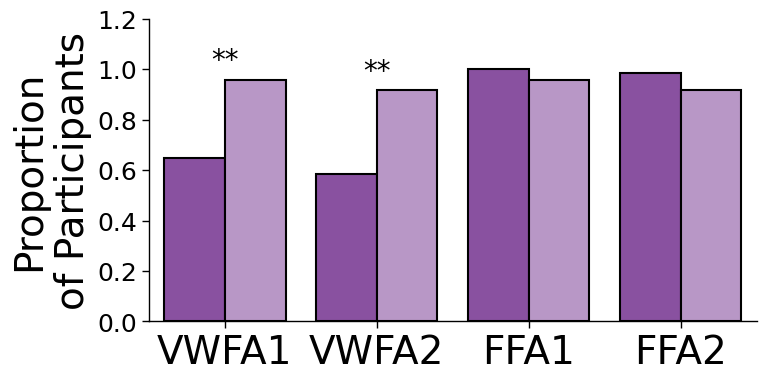

In [9]:
# Set to True if you want to save the figure
save_fig = True

# load data
dysGroup_df = pd.read_csv(f'{data_dir}fig_2b.csv')

# Calculate p-values for significance
p_values = []
statistics = []
DOFs=[]
for roi in ROIs:
    # Get counts for each ROI and group
    counts_dyslexic = dysGroup_df[(dysGroup_df['ROI'] == roi) & (dysGroup_df['dysGroup'] == 'dyslexic')]['count'].values
    totals_dyslexic = dysGroup_df[(dysGroup_df['ROI'] == roi) & (dysGroup_df['dysGroup'] == 'dyslexic')]['num_participants'].values
    counts_typical = dysGroup_df[(dysGroup_df['ROI'] == roi) & (dysGroup_df['dysGroup'] == 'typical')]['count'].values
    totals_typical = dysGroup_df[(dysGroup_df['ROI'] == roi) & (dysGroup_df['dysGroup'] == 'typical')]['num_participants'].values
    
    if len(counts_dyslexic) > 0 and len(counts_typical) > 0:
        count_dyslexic = counts_dyslexic[0]
        total_dyslexic = totals_dyslexic[0]
        count_typical = counts_typical[0]
        total_typical = totals_typical[0]
        
        # Construct the contingency table using counts
        table = [
            [count_dyslexic, total_dyslexic - count_dyslexic],
            [count_typical, total_typical - count_typical]
        ]
        
        # Apply Fisher's exact test if there are zeros in the table, otherwise use chi-square test
        if 0 in table[0] or 0 in table[1]:
            statistic, p = fisher_exact(table)
            dof = 'XXX'
        else:
            statistic, p, dof, _ = chi2_contingency(table)
    else:
        p = float('nan')  # No p-value if data is missing

    p_values.append(p)
    statistics.append(statistic)
    DOFs.append(dof)

# Plot the data
g = sns.catplot(x='ROI', y='proportion', hue='dysGroup',
                data=dysGroup_df, kind='bar', palette=list(dysGroup_palette.values()),
                height=4, aspect=1.8)
g.set_axis_labels("", "Proportion\nof Participants", size=28)
g.set_xticklabels(rois, size=28)
g.set_yticklabels(size=18)

# Add borders to the bars
for ax in g.axes.flat:
    for bar in ax.patches:
        bar.set_edgecolor('black')  # Set the border color
        bar.set_linewidth(1.5)      # Set the border width

# Remove the original legend
g._legend.remove()

# Add significance indicators
for i, p in enumerate(p_values):
    significance = ''
    if pd.notna(p):
        if p < 0.001:
            significance = '***'
            print(f'{p} ***        {statistics[i]}      {DOFs[i]}')
        elif p < 0.01:
            significance = '**'
            print(f'{p} **        {statistics[i]}      {DOFs[i]}')
        elif p < 0.05:
            significance = '*'
            print(f'{p} *        {statistics[i]}      {DOFs[i]}')
        elif p >= 0.05:
            significance = ''
            print(f'{p}        {statistics[i]}      {DOFs[i]}')
    if significance:
        # Position the text above the highest bar for the given ROI
        y_max = dysGroup_df[dysGroup_df['ROI'] == ROIs[i]]['proportion'].max()
        if np.isfinite(y_max):  # Ensure y_max is a finite value
            ax = g.axes.flat[0]
            ax.text(i, y_max + 0.02, significance, ha='center', va='bottom', fontsize=20, color='black')

# Save the figure
if save_fig:
    plt.savefig(f'{fig_dir}fig_2b.svg', bbox_inches="tight", transparent=True, dpi=400)

plt.show()

# Longitudinal

/Users/jamiel12/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jamiel12/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jamiel12/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

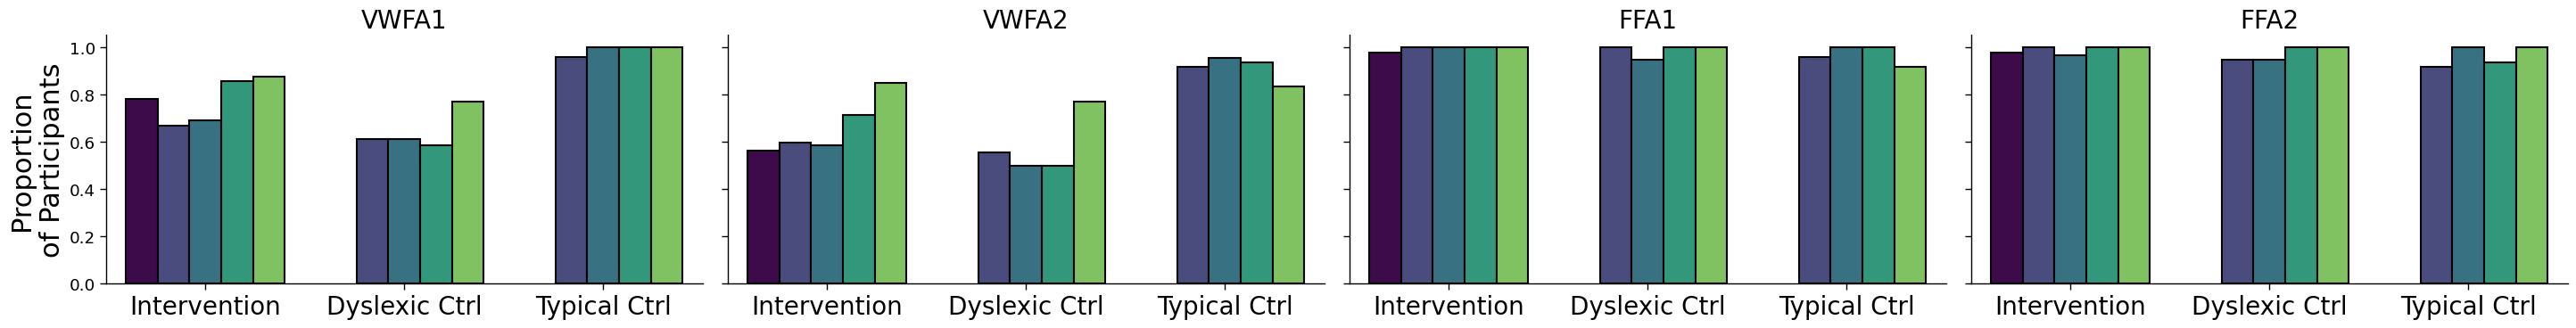

In [10]:
# Set to True if you want to save the figure
save_fig = False

# load data
df_counts = pd.read_csv(f'{data_dir}fig_3b.csv')

subgroup_order = ['intervention','dys_control', 'typ_control']
subGroup_labels = ['Intervention', 'Dyslexic Ctrl', 'Typical Ctrl']

# Convert 'subgroup' to categorical type with the desired order
df_counts['study_group'] = pd.Categorical(df_counts['study_group'], categories=subgroup_order, ordered=True)

sns.set_theme(context='paper', style=None, font_scale=1.5)
g=sns.catplot(x = 'study_group', y = 'proportion', col = 'ROI',hue = 'ses',
            data = df_counts, kind='bar', palette=list(ses_palette.values()),
             height=4, aspect=1.8)
g.set_axis_labels("", "Proportion\nof Participants",size=22)
g.set_xticklabels(subGroup_labels,size=20)


# Set custom titles for each subplot
for ax, title in zip(g.axes.flat, rois):
    ax.set_title(title, size=20)

# Add borders to the bars
for ax in g.axes.flat:
    for bar in ax.patches:
        bar.set_edgecolor('black')  # Set the border color
        bar.set_linewidth(1.5)      # Set the border width

g._legend.remove()

# Save the figure if save_fig is set to True
if save_fig:
    plt.savefig(f'{fig_dir}fig_3b.svg',bbox_inches="tight",transparent=True, dpi=400)
